In [ ]:
# Use ! to run a terminal command

! pip3 install wavio 
! pip3 install librosa
! pip3 install sounddevice
! pip3 install matplotlib==3.7.3


In [4]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np

In [5]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 5

In [24]:
# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
path = "/Users/prankfarsons/Desktop/exquisite_opal_jewels.wav"
write(path,sr,recording)

recording...............


In [6]:
# Look at the discrete number array we got from the audio
path = "/Users/prankfarsons/Desktop/exquisite_opal_jewels.wav"
x, sr = librosa.load(path)
print("recording shape", x.shape)
print("sampling rate", sr)

recording shape (110250,)
sampling rate 22050


Text(126.09722222222221, 0.5, 'Amplitude')

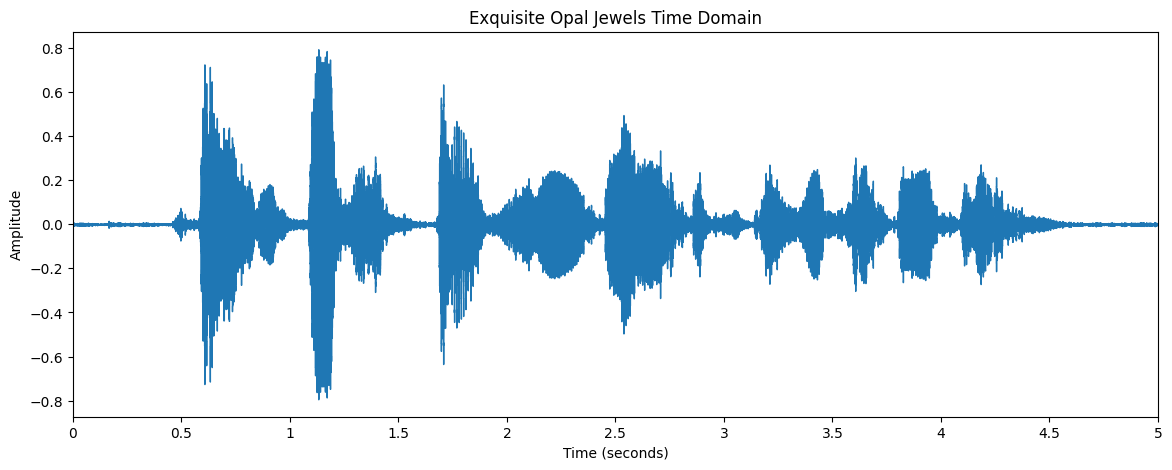

In [7]:
plot_title = "Exquisite Opal Jewels Time Domain"
plt.figure(figsize=(14, 5))
plt.title(plot_title)
plt.xlim(0, 5)
librosa.display.waveshow(x, sr=sr)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

In [8]:
# Play the audio
ipd.Audio(x, rate=sr) # load a NumPy array

(1025, 216)


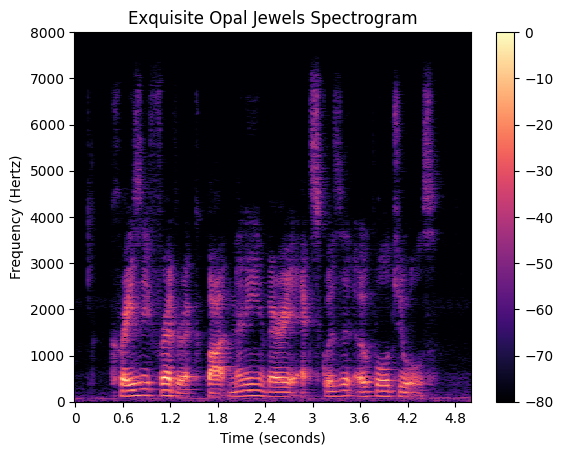

In [9]:
plot_title = "Exquisite Opal Jewels Spectrogram"
freq = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
print(freq.shape)


fig, ax = plt.subplots()
plt.ylim(0,8000)
plt.title(plot_title)
img = librosa.display.specshow(freq, x_axis='time', y_axis='linear',ax=ax)
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hertz)")
fig.colorbar(img, ax=ax)

In [13]:
def calculate_delay(ear_canal):
    timedelay = (ear_canal / 343) 
    samples = timedelay * sr # sample rate = 44100Hz
    return samples;

frank_samples = calculate_delay(0.1905) # 7.5 inches, 0.1905 meters
#perrin_samples =

delay_0ms = 0
delay_1ms = round(0.001 * sr)
delay_10ms = round(0.01 * sr)
delay_100ms = round(0.1 * sr)
delay_avg = round(frank_samples)

L = x.reshape(-1, 1)
R = x

def delay_array(delay):
    delete_elements = R[0:R.size-delay]
    pad_zeros = np.pad(delete_elements, (delay, 0), 'constant')
    delayed_array = pad_zeros.reshape(-1, 1)
    return delayed_array

delay_0ms_array = np.hstack((L, delay_array(delay_0ms)))
delay_1ms_array = np.hstack((L, delay_array(delay_1ms)))
delay_10ms_array = np.hstack((L, delay_array(delay_10ms)))
delay_100ms_array = np.hstack((L, delay_array(delay_100ms)))
delay_avg_array = np.hstack((L, delay_array(delay_avg)))

write("/Users/prankfarsons/Desktop/delay_0ms.wav", sr, delay_0ms_array)
write("/Users/prankfarsons/Desktop/delay_1ms.wav", sr, delay_1ms_array)
write("/Users/prankfarsons/Desktop/delay_10ms.wav", sr, delay_10ms_array)
write("/Users/prankfarsons/Desktop/delay_100ms.wav", sr, delay_100ms_array)
write("/Users/prankfarsons/Desktop/delay_avg.wav", sr, delay_avg_array)

delay_0ms_array_1_5dB = np.hstack((L, delay_array(delay_0ms)*0.7))
delay_0ms_array_3dB = np.hstack((L, delay_array(delay_0ms)*0.5))
delay_0ms_array_6dB = np.hstack((L, delay_array(delay_0ms)*0.25))

delay_avg_array_1_5dB = np.hstack((L, delay_array(delay_avg)*0.7))
delay_avg_array_3dB = np.hstack((L, delay_array(delay_avg)*0.5))
delay_avg_array_6dB = np.hstack((L, delay_array(delay_avg)*0.25))

write("/Users/prankfarsons/Desktop/1.5dB Attenuation, 0ms Delay.wav", sr, delay_0ms_array_1_5dB)
write("/Users/prankfarsons/Desktop/3dB Attenuation, 0ms Delay.wav", sr, delay_0ms_array_3dB)
write("/Users/prankfarsons/Desktop/6dB Attenuation, 0ms Delay.wav", sr, delay_0ms_array_6dB)

write("/Users/prankfarsons/Desktop/1.5dB Attenuation, Avg Delay.wav", sr, delay_avg_array_1_5dB)
write("/Users/prankfarsons/Desktop/3dB Attenuation, Avg Delay.wav", sr, delay_avg_array_3dB)
write("/Users/prankfarsons/Desktop/6dB Attenuation, Avg Delay.wav", sr, delay_avg_array_6dB)